# Predict Term Deposit - Banking

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

# Attribute information:
   Input variables:
  
   ## bank client data:
   
   1 - age (numeric)
  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
  
   6 - balance: average yearly balance, in euros (numeric) 
  
   7 - housing: has housing loan? (binary: "yes","no")
  
   8 - loan: has personal loan? (binary: "yes","no")
  
   ## related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
   ## other attributes:
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)

  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

# Output variable (desired target):

  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
# Required libraries
import numpy as np  # linear Algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for Plots
import seaborn as sns # for Plots

In [2]:
df = pd.read_csv('data.csv')  #Load the CSV into a DataFrame

In [3]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [4]:
#Checking out the categories and their respective counts in each feature
print("Job:",df.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",df.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",df.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",df.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",df.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",df.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",df.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",df.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",df.day.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",df.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",df.deposit.value_counts(),sep = '\n')
print("-"*40)

Job:
management       1923
blue-collar      1472
technician       1371
admin.           1017
services          671
retired           563
self-employed     307
unemployed        282
student           273
entrepreneur      244
housemaid         197
unknown            51
Name: job, dtype: int64
----------------------------------------
Marital:
married     4744
single      2645
divorced     982
Name: marital, dtype: int64
----------------------------------------
Education:
secondary    4113
tertiary     2754
primary      1128
unknown       376
Name: education, dtype: int64
----------------------------------------
Default:
no     8244
yes     127
Name: default, dtype: int64
----------------------------------------
Housing loan:
no     4354
yes    4017
Name: housing, dtype: int64
----------------------------------------
Personal loan:
no     7250
yes    1121
Name: loan, dtype: int64
----------------------------------------
Contact:
cellular     6041
unknown      1763
telephone     567
Name: 

## Exploratory Data Analysis (EDA) 

In [5]:
# Looking at statistics of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8371 non-null   int64 
 1   job        8371 non-null   object
 2   marital    8371 non-null   object
 3   education  8371 non-null   object
 4   default    8371 non-null   object
 5   balance    8371 non-null   int64 
 6   housing    8371 non-null   object
 7   loan       8371 non-null   object
 8   contact    8371 non-null   object
 9   day        8371 non-null   int64 
 10  month      8371 non-null   object
 11  duration   8371 non-null   int64 
 12  campaign   8371 non-null   int64 
 13  pdays      8371 non-null   int64 
 14  previous   8371 non-null   int64 
 15  poutcome   8371 non-null   object
 16  deposit    8371 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


In [6]:
df.deposit.value_counts()

no     4428
yes    3943
Name: deposit, dtype: int64

In [7]:
df.default.value_counts()

no     8244
yes     127
Name: default, dtype: int64

In [8]:
df.drop("default",inplace=True,axis=1)

In [9]:
# To check duplicated values 
print(df.duplicated().value_counts()) 

False    8371
dtype: int64


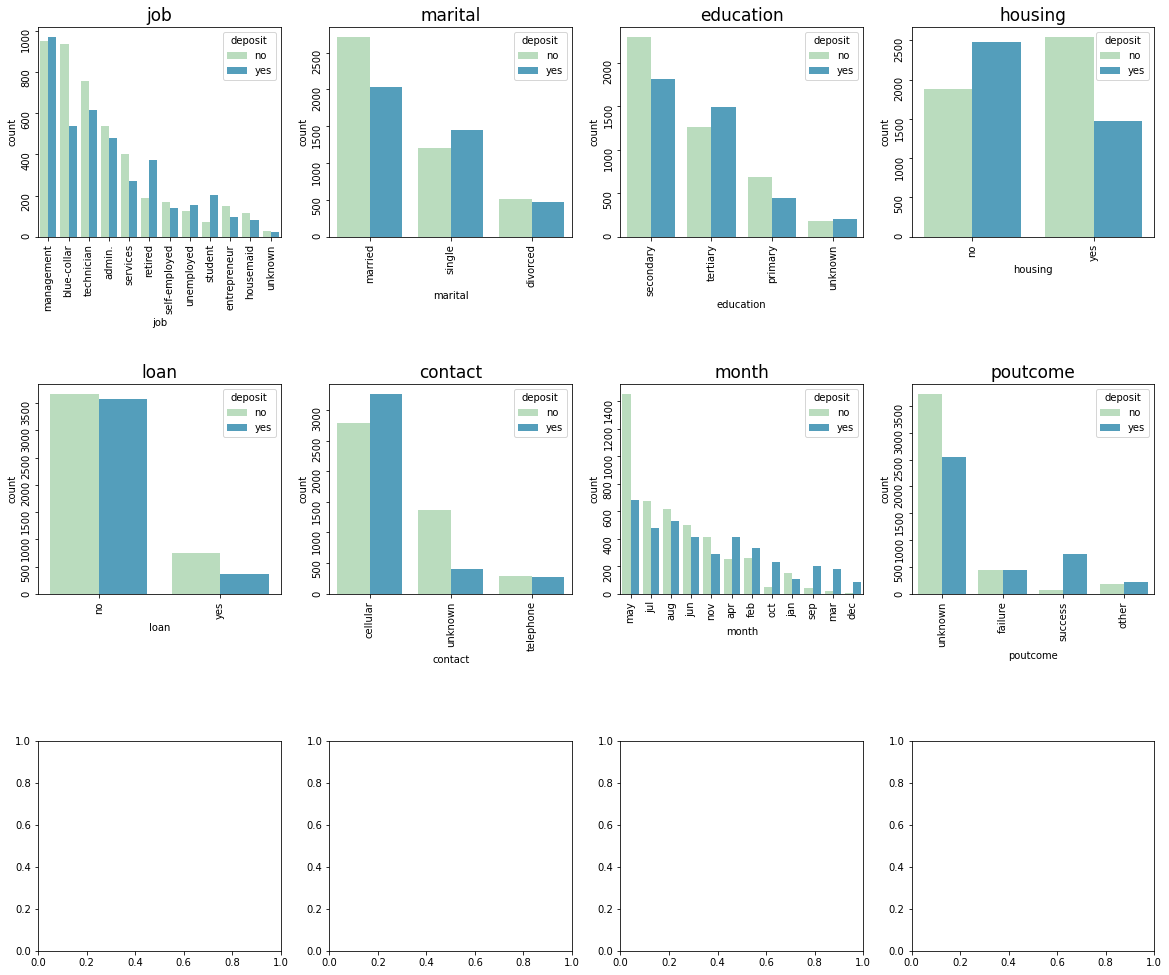

In [10]:
fig, ax = plt.subplots(3,4, figsize=(20,17))
cat = df.select_dtypes('object').columns.to_list()
cat = cat[:-1]
ax = ax.ravel()
position = 0
for i in cat:
    
    order = df[i].value_counts().index
    sns.countplot(data=df, x=i, ax=ax[position], hue='deposit', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

Clearly, the data is imbalanced

For the education feature, there are some similar values like basic.9y, basic.6y and basic.4y. I convert them to "middle.shool"

In [11]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df.loc[df['education'] == i, 'education'] = "middle.school"

df['education'].value_counts()

secondary    4113
tertiary     2754
primary      1128
unknown       376
Name: education, dtype: int64

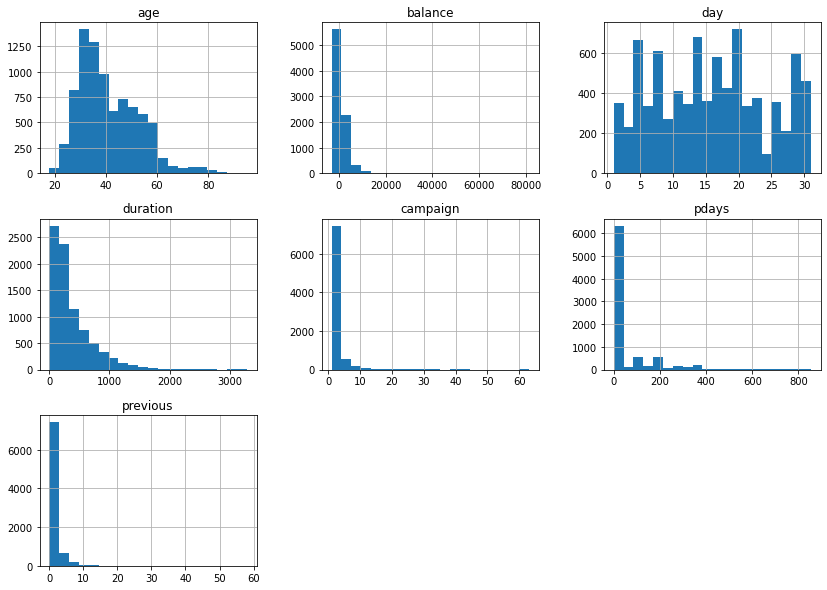

In [12]:
df.hist(bins=20, figsize=(14,10))
plt.show()

In [13]:
# binary if were was an outcome of marketing campane
df.poutcome = df.poutcome.map({'unknown':0,'other':1, 'failure':0, 'success':1}).astype('uint8') 

In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,poutcome
count,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000
mean,41.197467,1517.811134,15.588460,372.898698,2.512603,49.911958,0.823677,0.144188
std,11.809300,3225.312218,8.406768,346.706743,2.734037,107.308417,2.315285,0.351302
min,18.000000,-3058.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,116.000000,8.000000,137.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,532.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1694.000000,21.000000,504.000000,3.000000,2.000000,1.000000,0.000000
max,95.000000,81204.000000,31.000000,3284.000000,63.000000,854.000000,58.000000,1.000000


In [15]:
# Convert target variable into numeric
df.deposit = df.deposit.map({'no':0, 'yes':1}).astype('uint8')

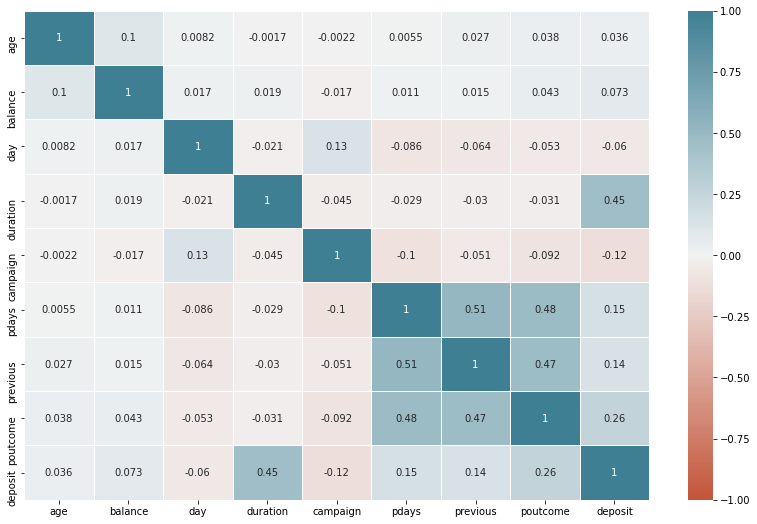

In [16]:
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()

* Duration highly affects the output target (e.g., if duration=0 then deposit=‘no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Since pdays and previous features are correlated, I convert previous feature to categorical feature.

In [17]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,127,yes,no,cellular,14,oct,113,1,50,2,1,0
1,41,housemaid,married,primary,365,no,no,cellular,8,aug,203,5,-1,0,0,0
2,39,management,single,tertiary,2454,yes,no,cellular,4,may,716,3,263,2,0,1
3,49,blue-collar,married,primary,6215,yes,no,cellular,11,may,549,1,-1,0,0,0
4,37,services,married,secondary,1694,yes,yes,cellular,29,jan,404,2,251,6,0,0


* Encoding the remaining features

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
objects = ["job","marital","education","housing","loan","contact","month","day"]
for i in objects:  
    df[i] = le.fit_transform(df[i])

In [19]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,9,1,2,127,1,0,0,13,10,113,1,50,2,1,0
1,41,3,1,0,365,0,0,0,7,1,203,5,-1,0,0,0
2,39,4,2,2,2454,1,0,0,3,8,716,3,263,2,0,1
3,49,1,1,0,6215,1,0,0,10,8,549,1,-1,0,0,0
4,37,7,1,1,1694,1,1,0,28,4,404,2,251,6,0,0


### Let's apply Machine learning techniques

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [21]:
x=df.iloc[:,:-1].values
y=df.iloc[:,15].values

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

#### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [24]:
lr.fit(x_train,y_train)

C:\Users\Faizan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred=lr.predict(x_test)

In [26]:
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=uint8)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [28]:
cm

array([[713, 186],
       [217, 559]], dtype=int64)

In [29]:
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7594029850746269
0.720360824742268
0.7503355704697987
0.735042735042735


### DecisionTreeClassifier 

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test, y_test)*100))

Decision Tree Test Accuracy 76.12%


### RandomForestClassifier 

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest Algorithm Accuracy Score : 83.52%


In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print(recall_score( y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8608247422680413
0.7990430622009569
0.8287841191066997


# Prediction on test_data.csv ​

In [41]:
result_df = pd.read_csv('test_data.csv')

In [42]:
result_df.drop("default",inplace=True,axis=1)

In [43]:
# binary if were was an outcome of marketing campane
result_df.poutcome = result_df.poutcome.map({'unknown':0,'other':1, 'failure':0, 'success':1}).astype('uint8') 

In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
objects = ["job","marital","education","housing","loan","contact","month","day"]
for i in objects:  
    result_df[i] = le.fit_transform(result_df[i])

In [45]:
result_df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,31,1,2,1,477,0,0,0,19,9,426,2,189,6,0
1,49,1,1,0,599,0,0,0,22,5,464,1,-1,0,0
2,51,6,2,2,400,0,1,0,26,8,200,1,-1,0,0
3,33,9,1,1,488,1,0,2,7,8,703,1,-1,0,0
4,34,0,1,1,40,1,0,1,4,8,125,2,-1,0,0


In [46]:
result_pred = rf.predict(result_df)

C:\Users\Faizan\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [47]:
result_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=uint8)

In [51]:
result = pd.DataFrame()

In [54]:
result['Deposit'] = result_pred
result['Deposit'].replace(0,'no',inplace=True)
result['Deposit'].replace(1,'yes',inplace=True)

In [55]:
result.head()

,Deposit
0,yes
1,yes
2,no
3,yes
4,no


In [57]:
result.to_csv('result.csv')